# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [5]:
#your code here
df=pd.DataFrame(titanic)
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [12]:
# your code here- numerical variable
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
titanic.select_dtypes(include="int64")

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [ ]:
#your code here- categorical variable


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

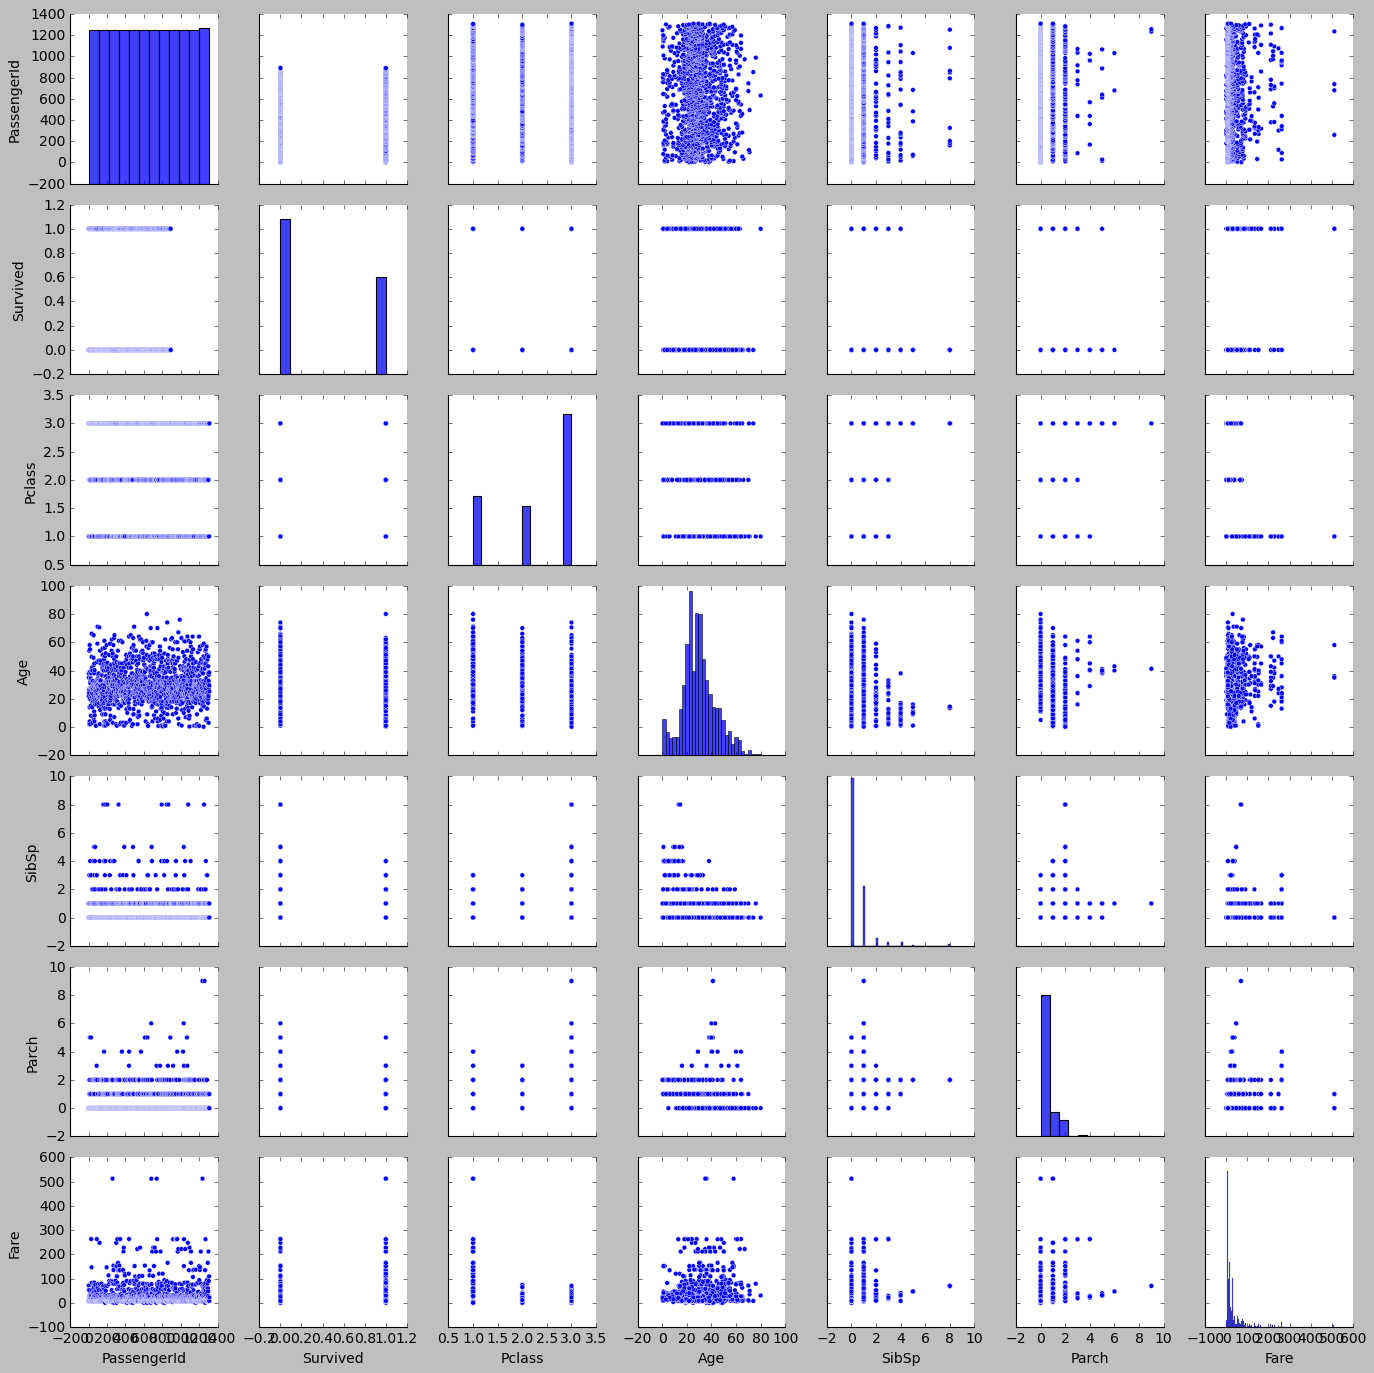

In [42]:
# your code here
sns.pairplot(data=titanic, plot_kws={"size":12.6})

#### Use the appropriate visulalization to show the distribution of the column `Age`

<AxesSubplot:ylabel='Frequency'>

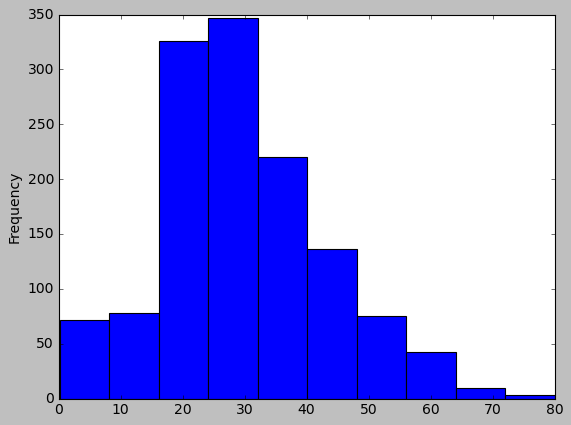

In [48]:
# your code here
titanic.Age.plot(kind="hist")

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

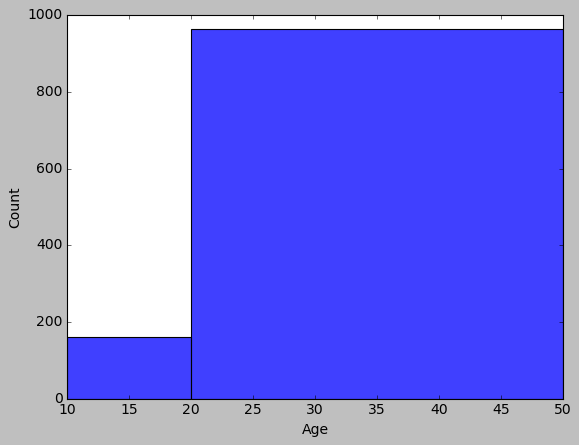

In [49]:
# your code here
sns.histplot(x=titanic.Age, bins=(10, 20, 50))

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# Yes, because the larger the range, the more detailed the data

#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

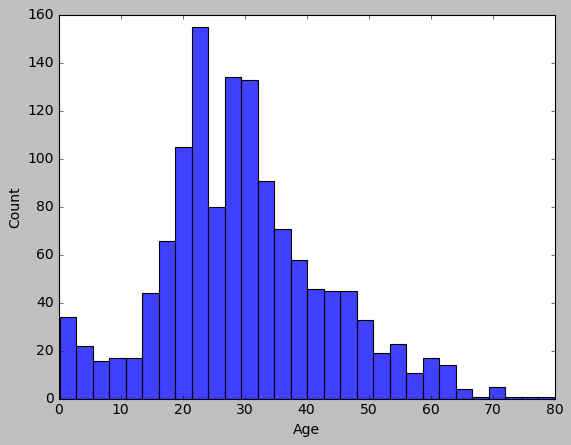

In [46]:
# your code here
sns.histplot(x=titanic.Age)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<AxesSubplot:xlabel='Gender', ylabel='Count'>

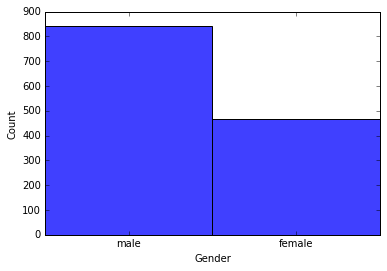

In [54]:
# your code here- 1st way
%matplotlib inline
sns.histplot(x=titanic.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

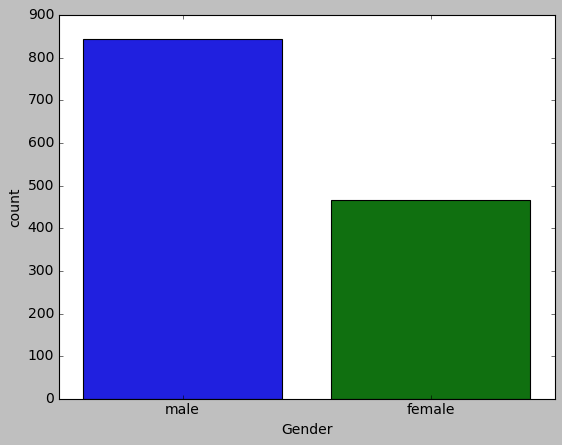

In [50]:
# your code here- 2nd way
sns.countplot(x=titanic.Gender)

#### Use the appropriate plot to visualize the column `Pclass` 


<AxesSubplot:xlabel='Pclass', ylabel='count'>

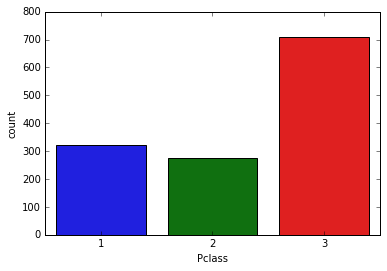

In [55]:
# your code here
sns.countplot(x=titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

<AxesSubplot:xlabel='Age', ylabel='Density'>

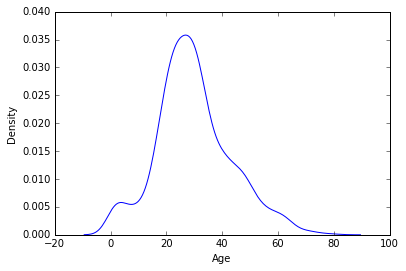

In [57]:
# your code here
sns.kdeplot(x=titanic.Age)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

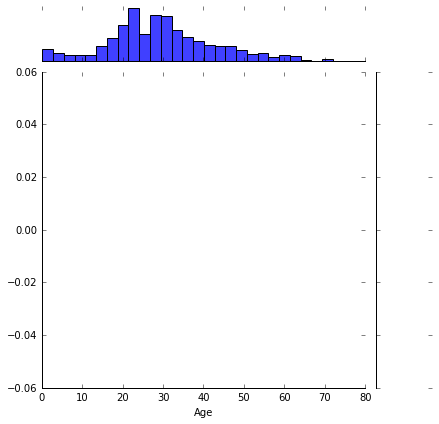

In [70]:
#your code here
sns.jointplot(x="Age", data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

<AxesSubplot:xlabel='Age', ylabel='Fare'>

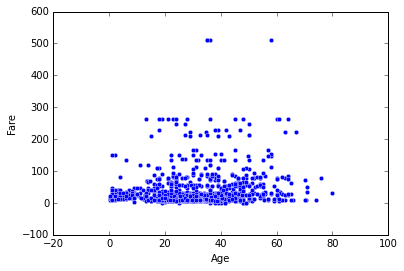

In [72]:
#your code-1st way
sns.scatterplot(data=titanic, x="Age", y="Fare")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

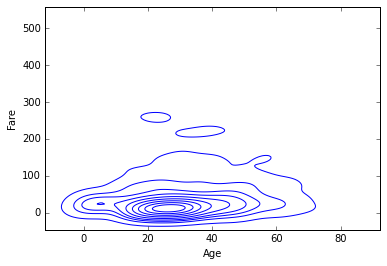

In [75]:
# your code-2nd way
sns.kdeplot(data=titanic, x="Age", y="Fare")

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

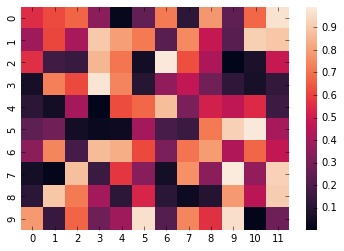

In [77]:
#your code here
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

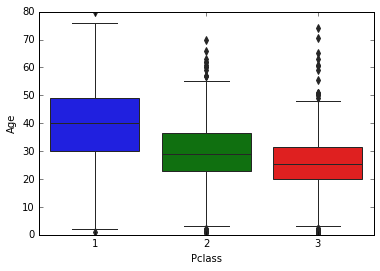

In [79]:
#your code here
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
g = sns.FacetGrid(data=titanic, col="Age")
g.map_titanic(sns.histplot, x="Gender", element="step")